In [1]:
from CustomPongEnv_v0_ram import Custom_Pong
import numpy as np
import random

In [2]:
env = Custom_Pong()
states = env.observation_space.shape[0]
actions = env.action_space.n

In [3]:
trials = 100
episodes = 400

rally_length_raw = np.zeros((trials,episodes))

for trial in range(trials):
    print(trial)
    
    for episode in range(episodes):

        state = env.reset()
        done = False
        score = 0

        while not done:
            #env.render()
            action = env.action_space.sample()

            state, reward, done, info = env.step(action)
            score += reward

        rally_length_raw[trial][episode] = score+1

    env.close()

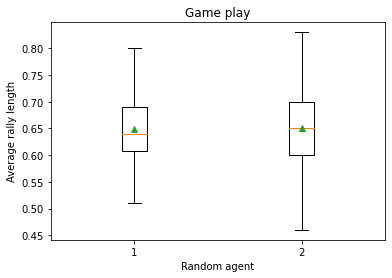

In [5]:
from matplotlib import pyplot as plt
rally_length_1_raw = rally_length_raw[:, 0:int(episodes/4)]
rally_length_2_raw = rally_length_raw[:, int(episodes/4):episodes]

rally_length_1 = np.mean(rally_length_1_raw, axis=0)
rally_length_2 = np.mean(rally_length_2_raw, axis=0)
x = [rally_length_1, rally_length_2]

#Plotting
xy = [x[0], x[1]]

plt.boxplot(xy, showmeans=True, showfliers=False, positions=[1,2])
plt.ylabel("Average rally length")
plt.xlabel("Random agent")
plt.title("Game play")
plt.savefig('random_agent.png', dpi=500, bbox_inches='tight')